<a href="https://colab.research.google.com/github/kalakhushi18/Machine-Learning-Projects/blob/dev/Time_series_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Download 10 years of historical data from Yahoo Finance

In [1]:
import yfinance as yf
import pandas as pd

# Define the list of tickers
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOGL', 'JPM', 'XOM', 'KO', 'JNJ', 'META']

# Download 10 years of daily data for each asset
data = yf.download(tickers, start='2013-01-01', end='2023-01-01', group_by='ticker')

# Save the data for analysis
data.to_csv('financial_data_10_assets.csv')

# Display the first few rows to verify the data
data.head()


[*********************100%***********************]  10 of 10 completed


Ticker                          META                                   \
Price                           Open       High        Low      Close   
Date                                                                    
2013-01-02 00:00:00+00:00  27.440001  28.180000  27.420000  28.000000   
2013-01-03 00:00:00+00:00  27.879999  28.469999  27.590000  27.770000   
2013-01-04 00:00:00+00:00  28.010000  28.930000  27.830000  28.760000   
2013-01-07 00:00:00+00:00  28.690001  29.790001  28.650000  29.420000   
2013-01-08 00:00:00+00:00  29.510000  29.600000  28.860001  29.059999   

Ticker                                                XOM             \
Price                      Adj Close    Volume       Open       High   
Date                                                                   
2013-01-02 00:00:00+00:00  27.915949  69846400  87.790001  88.720001   
2013-01-03 00:00:00+00:00  27.686640  63140600  88.459999  88.889999   
2013-01-04 00:00:00+00:00  28.673668  72715400  88.500000  89.089996   
2013-01-07 00:00:00+00:00  29.331684  83781800  88.309998  88.489998   
2013-01-08 00:00:00+00:00  28.972765  45871300  87.820000  88.480003   

Ticker                                           ...     AMZN           \
Price                            Low      Close  ...      Low    Close   
Date                                             ...                     
2013-01-02 00:00:00+00:00  87.239998  88.709999  ...  12.6630  12.8655   
2013-01-03 00:00:00+00:00  88.160004  88.550003  ...  12.8185  12.9240   
2013-01-04 00:00:00+00:00  88.370003  88.959999  ...  12.8325  12.9575   
2013-01-07 00:00:00+00:00  87.570000  87.930000  ...  13.1335  13.4230   
2013-01-08 00:00:00+00:00  87.290001  88.480003  ...  13.1785  13.3190   

Ticker                                             GOOGL             \
Price                     Adj Close    Volume       Open       High   
Date                                                                  
2013-01-02 00:00:00+00:00   12.8655  65420000  18.003504  18.193193   
2013-01-03 00:00:00+00:00   12.9240  55018000  18.141392  18.316566   
2013-01-04 00:00:00+00:00   12.9575  37484000  18.251753  18.555305   
2013-01-07 00:00:00+00:00   13.4230  98200000  18.404655  18.503002   
2013-01-08 00:00:00+00:00   13.3190  60214000  18.406906  18.425926   

Ticker                                                                 
Price                            Low      Close  Adj Close     Volume  
Date                                                                   
2013-01-02 00:00:00+00:00  17.931683  18.099348  18.054642  101550348  
2013-01-03 00:00:00+00:00  18.036036  18.109859  18.065128   92635272  
2013-01-04 00:00:00+00:00  18.210211  18.467718  18.422102  110429460  
2013-01-07 00:00:00+00:00  18.282784  18.387136  18.341719   66161772  
2013-01-08 00:00:00+00:00  18.128880  18.350851  18.305523   66976956  

[5 rows x 60 columns]

Exploratory Data Analysis (EDA)

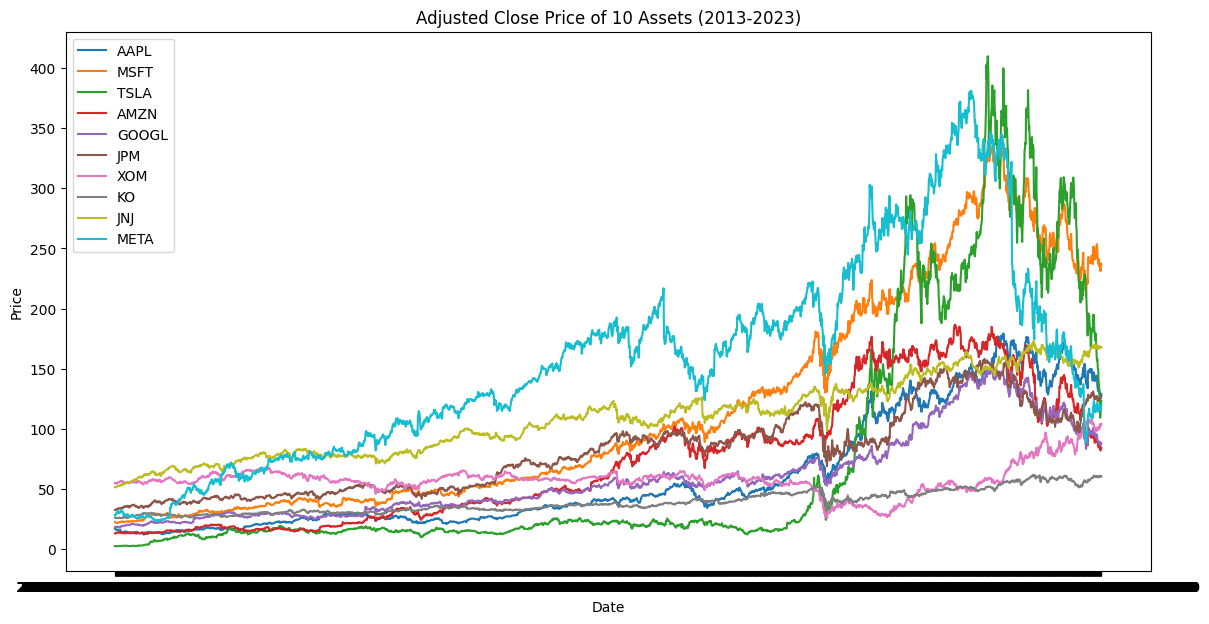

Ticker      META       XOM      TSLA        KO      AAPL       JNJ      MSFT  \
Ticker                                                                         
META    1.000000 -0.266828  0.686966  0.725817  0.773171  0.825296  0.835744   
XOM    -0.266828  1.000000  0.206244  0.293162  0.174488  0.188909  0.099959   
TSLA    0.686966  0.206244  1.000000  0.815815  0.952314  0.806750  0.918000   
KO      0.725817  0.293162  0.815815  1.000000  0.920864  0.952259  0.931728   
AAPL    0.773171  0.174488  0.952314  0.920864  1.000000  0.917643  0.983051   
JNJ     0.825296  0.188909  0.806750  0.952259  0.917643  1.000000  0.936829   
MSFT    0.835744  0.099959  0.918000  0.931728  0.983051  0.936829  1.000000   
JPM     0.889561  0.085507  0.777581  0.890808  0.872588  0.929374  0.917075   
AMZN    0.925422 -0.138826  0.809213  0.844442  0.903257  0.905288  0.944000   
GOOGL   0.857801  0.139710  0.923302  0.910621  0.963919  0.928079  0.980315   

Ticker       JPM      AMZN     GOOGL  


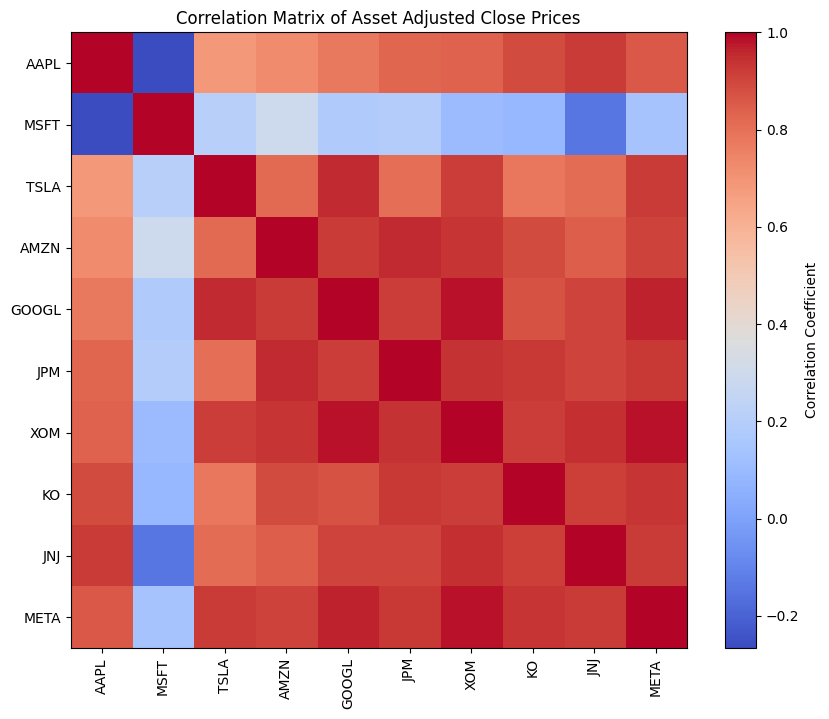

In [3]:
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('financial_data_10_assets.csv', header=[0, 1], index_col=0)

# 1. Summary statistics
# summary_stats = data.describe()
# print(summary_stats)

# 2. Plot adjusted close prices for all assets over time
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[(ticker, 'Adj Close')], label=ticker)

plt.title('Adjusted Close Price of 10 Assets (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 3. Calculate correlation between the assets
corr_matrix = data.xs('Adj Close', axis=1, level=1).corr()
print(corr_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(tickers)), tickers, rotation=90)
plt.yticks(range(len(tickers)), tickers)
plt.title('Correlation Matrix of Asset Adjusted Close Prices')
plt.show()


Data Preprocessing

We need to:

    - Handle missing values if there are any.
    - Normalize the data (since neural networks generally perform better with scaled inputs).
    - Split the data into training (8 years), validation (1 year), and test sets (1 year).

In [4]:
from sklearn.preprocessing import MinMaxScaler   # normalizing the data
from sklearn.model_selection import train_test_split

# Extract the adjusted close prices for all assets
adj_close_data = data.xs('Adj Close', axis=1, level=1)

# Handle missing values (if any) by forward-filling
adj_close_data.fillna(method='ffill', inplace=True)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
adj_close_scaled = pd.DataFrame(scaler.fit_transform(adj_close_data), columns=tickers, index=adj_close_data.index)

print("Val size: ", 0.9 * len(adj_close_scaled))
# Split into training (8 years), validation (1 year), and testing (1 year)
train_size = int(0.8 * len(adj_close_scaled))  # 8 years
val_size = int(0.9 * len(adj_close_scaled))    # 1 year validation

train_data = adj_close_scaled.iloc[:train_size]
val_data = adj_close_scaled.iloc[train_size:val_size]
test_data = adj_close_scaled.iloc[val_size:]

# Convert to numpy arrays for use in neural networks
X_train = train_data.values
X_val = val_data.values
X_test = test_data.values

# Use the data shifted by one day for predictions (i.e., predict the next day price)
y_train = train_data.shift(-1).values[:-1]
y_val = val_data.shift(-1).values[:-1]
y_test = test_data.shift(-1).values[:-1]

print("Training data shape: ", X_train.shape)
print("Validation data shape: ", X_val.shape)
print("Test data shape: ", X_test.shape)


Val size:  2266.2000000000003
Training data shape:  (2014, 10)
Validation data shape:  (252, 10)
Test data shape:  (252, 10)


<ipython-input-4-e20d5144b355>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  adj_close_data.fillna(method='ffill', inplace=True)
<ipython-input-4-e20d5144b355>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_close_data.fillna(method='ffill', inplace=True)


In [5]:
y_train

array([[1.35548944e-02, 3.57044932e-01, 3.04088696e-04, ...,
        0.00000000e+00, 2.94271225e-03, 3.93592818e-03],
       [1.63104055e-02, 3.60115995e-01, 2.43597091e-04, ...,
        4.54788528e-03, 3.13506907e-03, 6.64186255e-03],
       [1.81474059e-02, 3.52400889e-01, 2.33787911e-04, ...,
        4.83564698e-03, 5.80791337e-03, 6.03254044e-03],
       ...,
       [7.07247905e-01, 1.26445616e-01, 5.37147834e-01, ...,
        6.37828428e-01, 8.71539811e-01, 5.37687029e-01],
       [7.06635511e-01, 1.21573456e-01, 5.39027978e-01, ...,
        6.35473645e-01, 8.82460912e-01, 5.31562232e-01],
       [6.92969281e-01, 1.24994332e-01, 5.62562135e-01, ...,
        6.37971201e-01, 8.72082405e-01, 5.23429840e-01]])

In [6]:
len(y_train)

2013

In [7]:
# Adjusted code for proper data alignment after shifting

# Convert to numpy arrays for use in neural networks
X_train = train_data.values
X_val = val_data.values
X_test = test_data.values

# Use the data shifted by one day for predictions (i.e., predict the next day price)
y_train = train_data.shift(-1).values[:-1]
y_val = val_data.shift(-1).values[:-1]
y_test = test_data.shift(-1).values[:-1]

# Ensure X_train, X_val, X_test have matching lengths with y_train, y_val, y_test
X_train = X_train[:-1]  # Remove the last row to match y_train length
X_val = X_val[:-1]      # Remove the last row to match y_val length
X_test = X_test[:-1]    # Remove the last row to match y_test length

print("Training data shape: ", X_train.shape)
print("Validation data shape: ", X_val.shape)
print("Test data shape: ", X_test.shape)


Training data shape:  (2013, 10)
Validation data shape:  (251, 10)
Test data shape:  (251, 10)


Neural Networks:

- Simple Shallow Neural Network (3 layers, 10 neurons)
- Medium-Sized Network (20 layers, 50 neurons)
- Deep Network (100 layers, 100 neurons)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Simple shallow network (3 layers, 10 neurons)
def build_shallow_nn(input_shape):
    model = Sequential([
        Dense(10, activation='relu', input_shape=input_shape),
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),
        Dense(len(tickers))  # Output layer (one for each asset)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train the shallow model
shallow_model = build_shallow_nn((X_train.shape[1],))
history_shallow = shallow_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0876 - val_loss: 0.3557
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0220 - val_loss: 0.1450
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0069 - val_loss: 0.0965
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - val_loss: 0.0796
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - val_loss: 0.0713
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0024 - val_loss: 0.0632
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - val_loss: 0.0589
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 0.0559
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0018 - val_loss: 0.0528
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - val_loss: 0.0496
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - val_loss: 0.0500
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - val_loss: 0.0490

In [ ]:
# Medium-sized network (20 layers, 50 neurons)
def build_medium_nn(input_shape):
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=input_shape))
    for _ in range(18):  # Add 18 more hidden layers (total 20)
        model.add(Dense(50, activation='relu'))
    model.add(Dense(len(tickers)))  # Output layer
    model.compile(optimizer='adam', loss='mse')
    return model

# Train the medium-sized model
medium_model = build_medium_nn((X_train.shape[1],))
history_medium = medium_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1)


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0556 - val_loss: 0.0393
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0050 - val_loss: 0.0306
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021 - val_loss: 0.0300
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0016 - val_loss: 0.0302
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014 - val_loss: 0.0321
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014 - val_loss: 0.0306
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - val_loss: 0.0418
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011 - val_loss: 0.0327
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.7025e-04 - val_loss: 0.0351
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.2393e-04 - val_loss: 0.0338
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.0840e-04 - val_loss: 0.0297
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.

In [ ]:
# Deep network (100 layers, 100 neurons)
def build_deep_nn(input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    for _ in range(98):  # Add 98 more hidden layers (total 100)
        model.add(Dense(100, activation='relu'))
    model.add(Dense(len(tickers)))  # Output layer
    model.compile(optimizer='adam', loss='mse')
    return model

# Train the deep model
deep_model = build_deep_nn((X_train.shape[1],))
history_deep = deep_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1)


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - loss: 0.0541 - val_loss: 0.2769
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0268 - val_loss: 0.2922
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0281 - val_loss: 0.2943
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0270 - val_loss: 0.2855
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0267 - val_loss: 0.2870
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0271 - val_loss: 0.2908
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0266 - val_loss: 0.2864
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0279 - val_loss: 0.2857
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0277 - val_loss: 0.2958
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0281 - val_loss: 0.2935
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0268 - val_loss: 0.3018
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.

## Regularization Techniques (Dropout & Early Stopping)

You can add dropout layers and early stopping to improve generalization and prevent overfitting.

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Modify the shallow network to include dropout
def build_shallow_nn_with_dropout(input_shape):
    model = Sequential([
        Dense(10, activation='relu', input_shape=input_shape),
        Dropout(0.3),  # Dropout layer
        Dense(10, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='relu'),
        Dropout(0.3),
        Dense(len(tickers))  # Output layer
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train with dropout and early stopping
shallow_model_with_dropout = build_shallow_nn_with_dropout((X_train.shape[1],))
history_shallow_with_dropout = shallow_model_with_dropout.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1, callbacks=[early_stopping])


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1131 - val_loss: 0.3513
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0478 - val_loss: 0.2406
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0324 - val_loss: 0.1852
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0255 - val_loss: 0.1511
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0220 - val_loss: 0.1423
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0183 - val_loss: 0.1152
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191 - val_loss: 0.1116
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164 - val_loss: 0.1017
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0145 - val_loss: 0.0848
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 - val_loss: 0.0799
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0142 - val_loss: 0.0778
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - val_lo

## Evaluation

Compare the models' performance using the mean squared error on the test set

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to evaluate a model
def evaluate_model(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    print(f"{model_name} - MSE: {mse:.6f}, MAE: {mae:.6f}")
    return mse, mae

# Evaluate all models
mse_shallow, mae_shallow = evaluate_model(shallow_model, X_test, y_test, "Shallow Model")
mse_medium, mae_medium = evaluate_model(medium_model, X_test, y_test, "Medium Model")
mse_deep, mae_deep = evaluate_model(deep_model, X_test, y_test, "Deep Model")
mse_shallow_dropout, mae_shallow_dropout = evaluate_model(shallow_model_with_dropout, X_test, y_test, "Shallow Model with Dropout")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Shallow Model - MSE: 0.050193, MAE: 0.197505
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step
Medium Model - MSE: 0.057569, MAE: 0.199410


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 256ms/step


Deep Model - MSE: 0.268128, MAE: 0.483503
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Shallow Model with Dropout - MSE: 0.108001, MAE: 0.290462


## Visualizing the Training Process

We can also visualize the training and validation losses to compare how well each model learned over the 50 epochs.

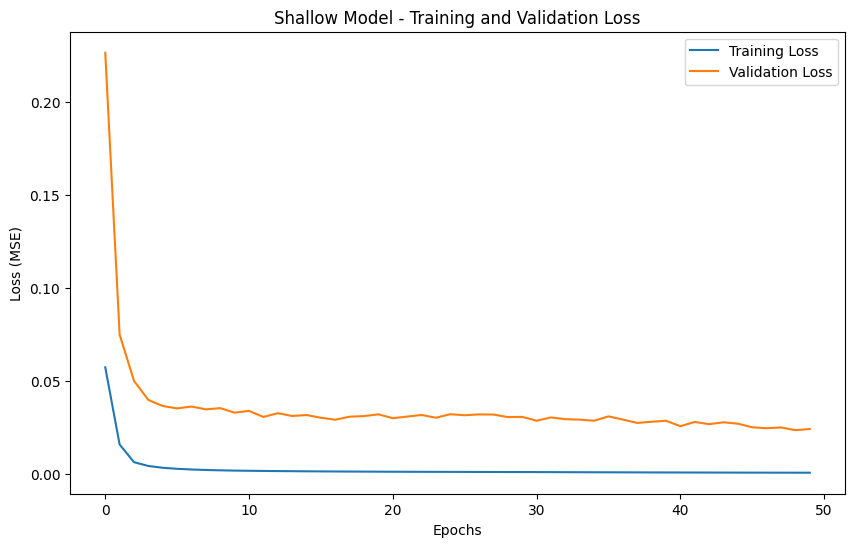

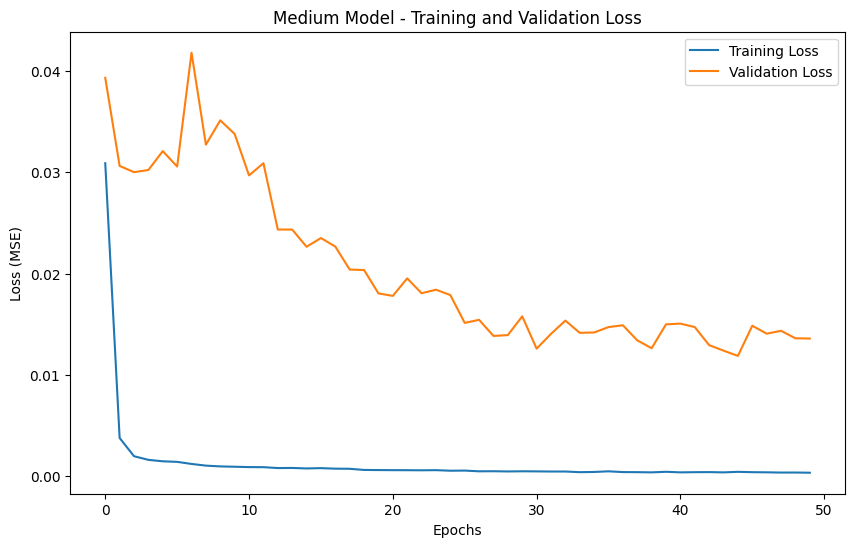

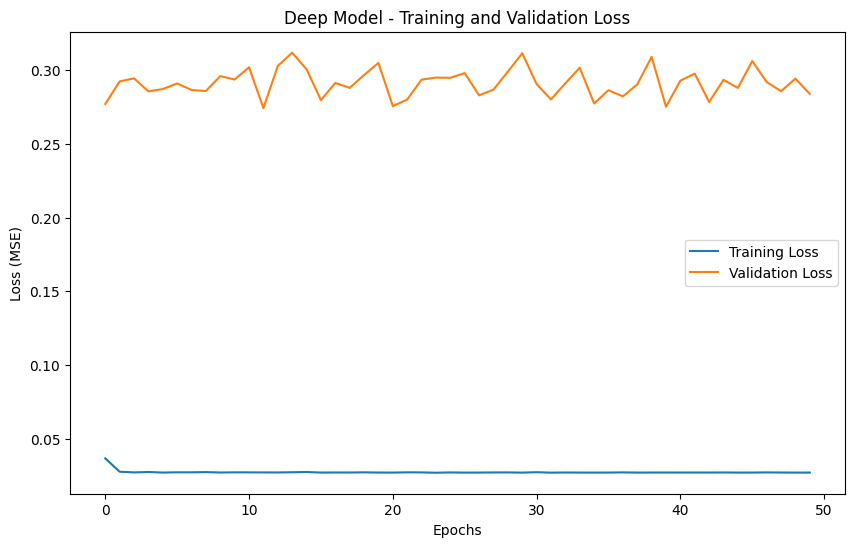

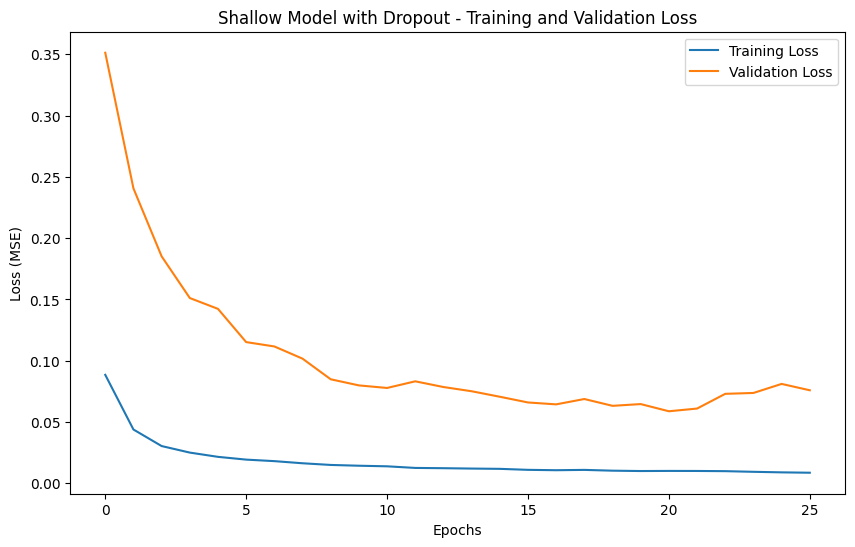

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training and validation losses
def plot_training_history(history, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.show()

# Plot for shallow model
plot_training_history(history_shallow, "Shallow Model")

# Plot for medium model
plot_training_history(history_medium, "Medium Model")

# Plot for deep model
plot_training_history(history_deep, "Deep Model")

# Plot for shallow model with dropout
plot_training_history(history_shallow_with_dropout, "Shallow Model with Dropout")


Forecast plots:
- Generate predictions using all four models.
- Rescale the predictions and actual values back to their original scale.
- Plot the real vs predicted values from all models in one plot.

In [ ]:
# Generate predictions for all four models
pred_shallow = shallow_model.predict(X_test)
pred_medium = medium_model.predict(X_test)
pred_deep = deep_model.predict(X_test)
pred_shallow_dropout = shallow_model_with_dropout.predict(X_test)

# Note: X_test contains the scaled data, so predictions are also in the normalized scale


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Rescale the predictions and actual test values back to their original scale
pred_shallow_rescaled = scaler.inverse_transform(pred_shallow)
pred_medium_rescaled = scaler.inverse_transform(pred_medium)
pred_deep_rescaled = scaler.inverse_transform(pred_deep)
pred_shallow_dropout_rescaled = scaler.inverse_transform(pred_shallow_dropout)

# Rescale the actual test values back to the original scale
y_test_rescaled = scaler.inverse_transform(y_test)


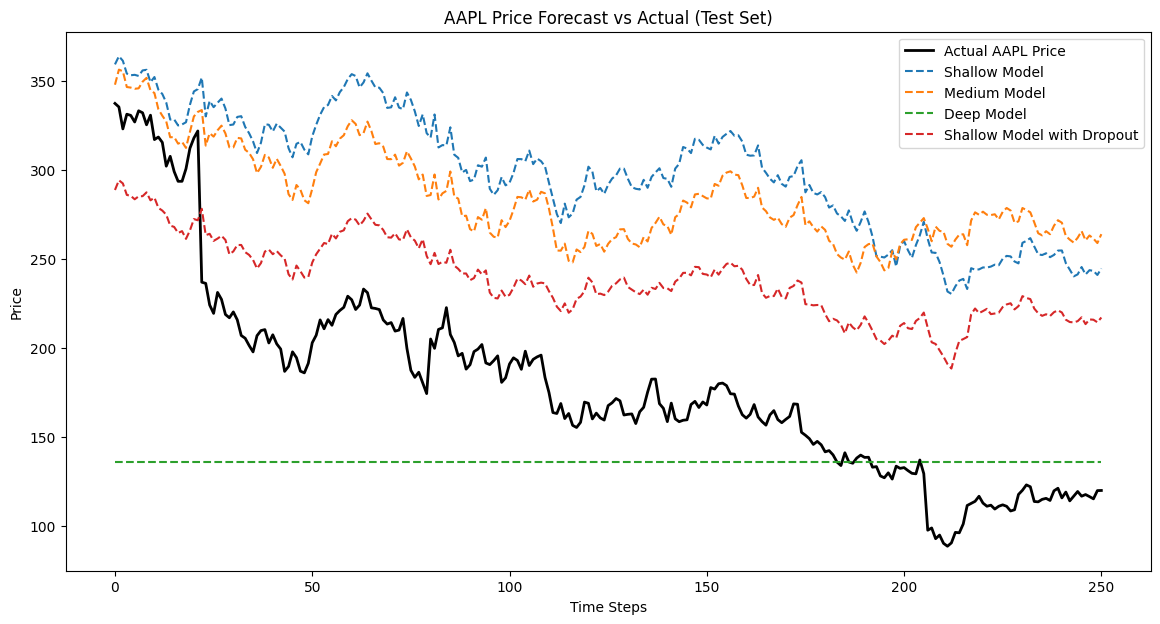

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select an asset (e.g., 'AAPL') to visualize
asset_idx = tickers.index('AAPL')  # Choose AAPL for example, change index for different assets

plt.figure(figsize=(14, 7))

# Plot actual test values
plt.plot(y_test_rescaled[:, asset_idx], label='Actual AAPL Price', color='black', linewidth=2)

# Plot predictions from each model
plt.plot(pred_shallow_rescaled[:, asset_idx], label='Shallow Model', linestyle='--')
plt.plot(pred_medium_rescaled[:, asset_idx], label='Medium Model', linestyle='--')
plt.plot(pred_deep_rescaled[:, asset_idx], label='Deep Model', linestyle='--')
plt.plot(pred_shallow_dropout_rescaled[:, asset_idx], label='Shallow Model with Dropout', linestyle='--')

# Add titles and labels
plt.title('AAPL Price Forecast vs Actual (Test Set)')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()

plt.show()


## Optional: Plot for All Assets

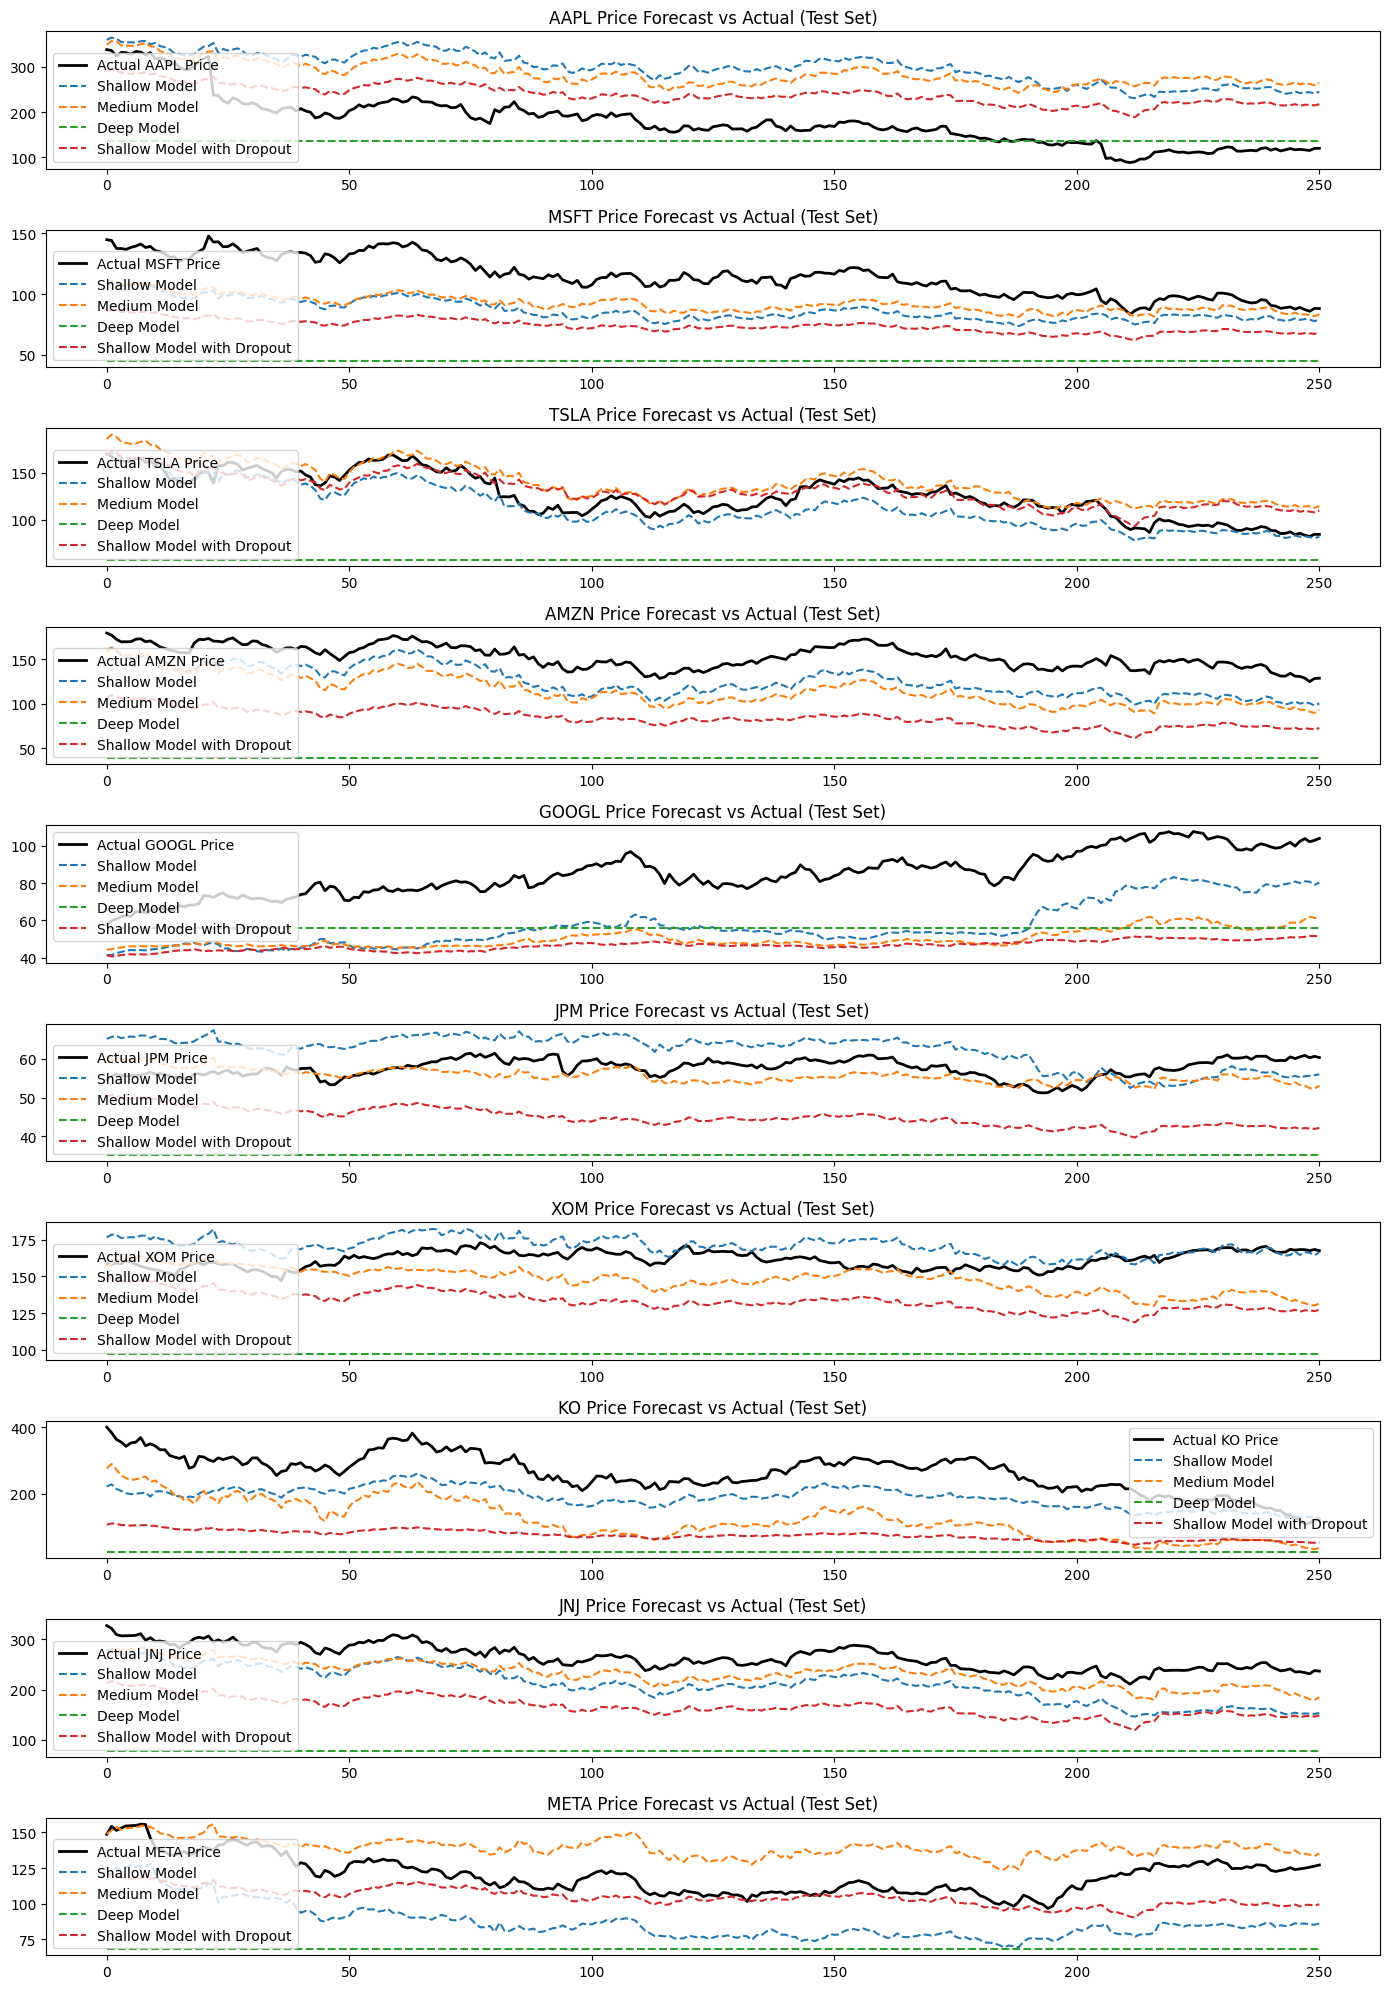

In [ ]:
# Plot forecasts for all assets
fig, axes = plt.subplots(len(tickers), 1, figsize=(14, 20))

for i, ticker in enumerate(tickers):
    axes[i].plot(y_test_rescaled[:, i], label=f'Actual {ticker} Price', color='black', linewidth=2)
    axes[i].plot(pred_shallow_rescaled[:, i], label='Shallow Model', linestyle='--')
    axes[i].plot(pred_medium_rescaled[:, i], label='Medium Model', linestyle='--')
    axes[i].plot(pred_deep_rescaled[:, i], label='Deep Model', linestyle='--')
    axes[i].plot(pred_shallow_dropout_rescaled[:, i], label='Shallow Model with Dropout', linestyle='--')

    axes[i].set_title(f'{ticker} Price Forecast vs Actual (Test Set)')
    axes[i].legend()

plt.tight_layout()
plt.show()


To include historical prices in the plots along with the forecasted values, we need to append the training and validation data (which represent historical data) to the plots.

- Plot historical prices: Combine the training, validation, and test data to show the full time series.
- Plot predictions: Append the model forecasts to the end of the historical price data.
- Include all four models: Plot forecasts from the shallow, medium, deep, and dropout models, along with historical data and actual test data.

In [ ]:
# Rescale historical prices (train and validation) and test prices
train_val_data = np.concatenate((train_data, val_data), axis=0)  # Concatenate train and validation data
train_val_prices_rescaled = scaler.inverse_transform(train_val_data)  # Rescale historical prices (train + val)
test_prices_rescaled = scaler.inverse_transform(test_data)  # Rescale test prices

# Full historical prices (train, validation, and test combined)
full_actual_prices = np.concatenate((train_val_prices_rescaled, test_prices_rescaled), axis=0)

# Print shapes to confirm the combined data
print(f"Full actual prices shape: {full_actual_prices.shape}")



Full actual prices shape: (2518, 10)


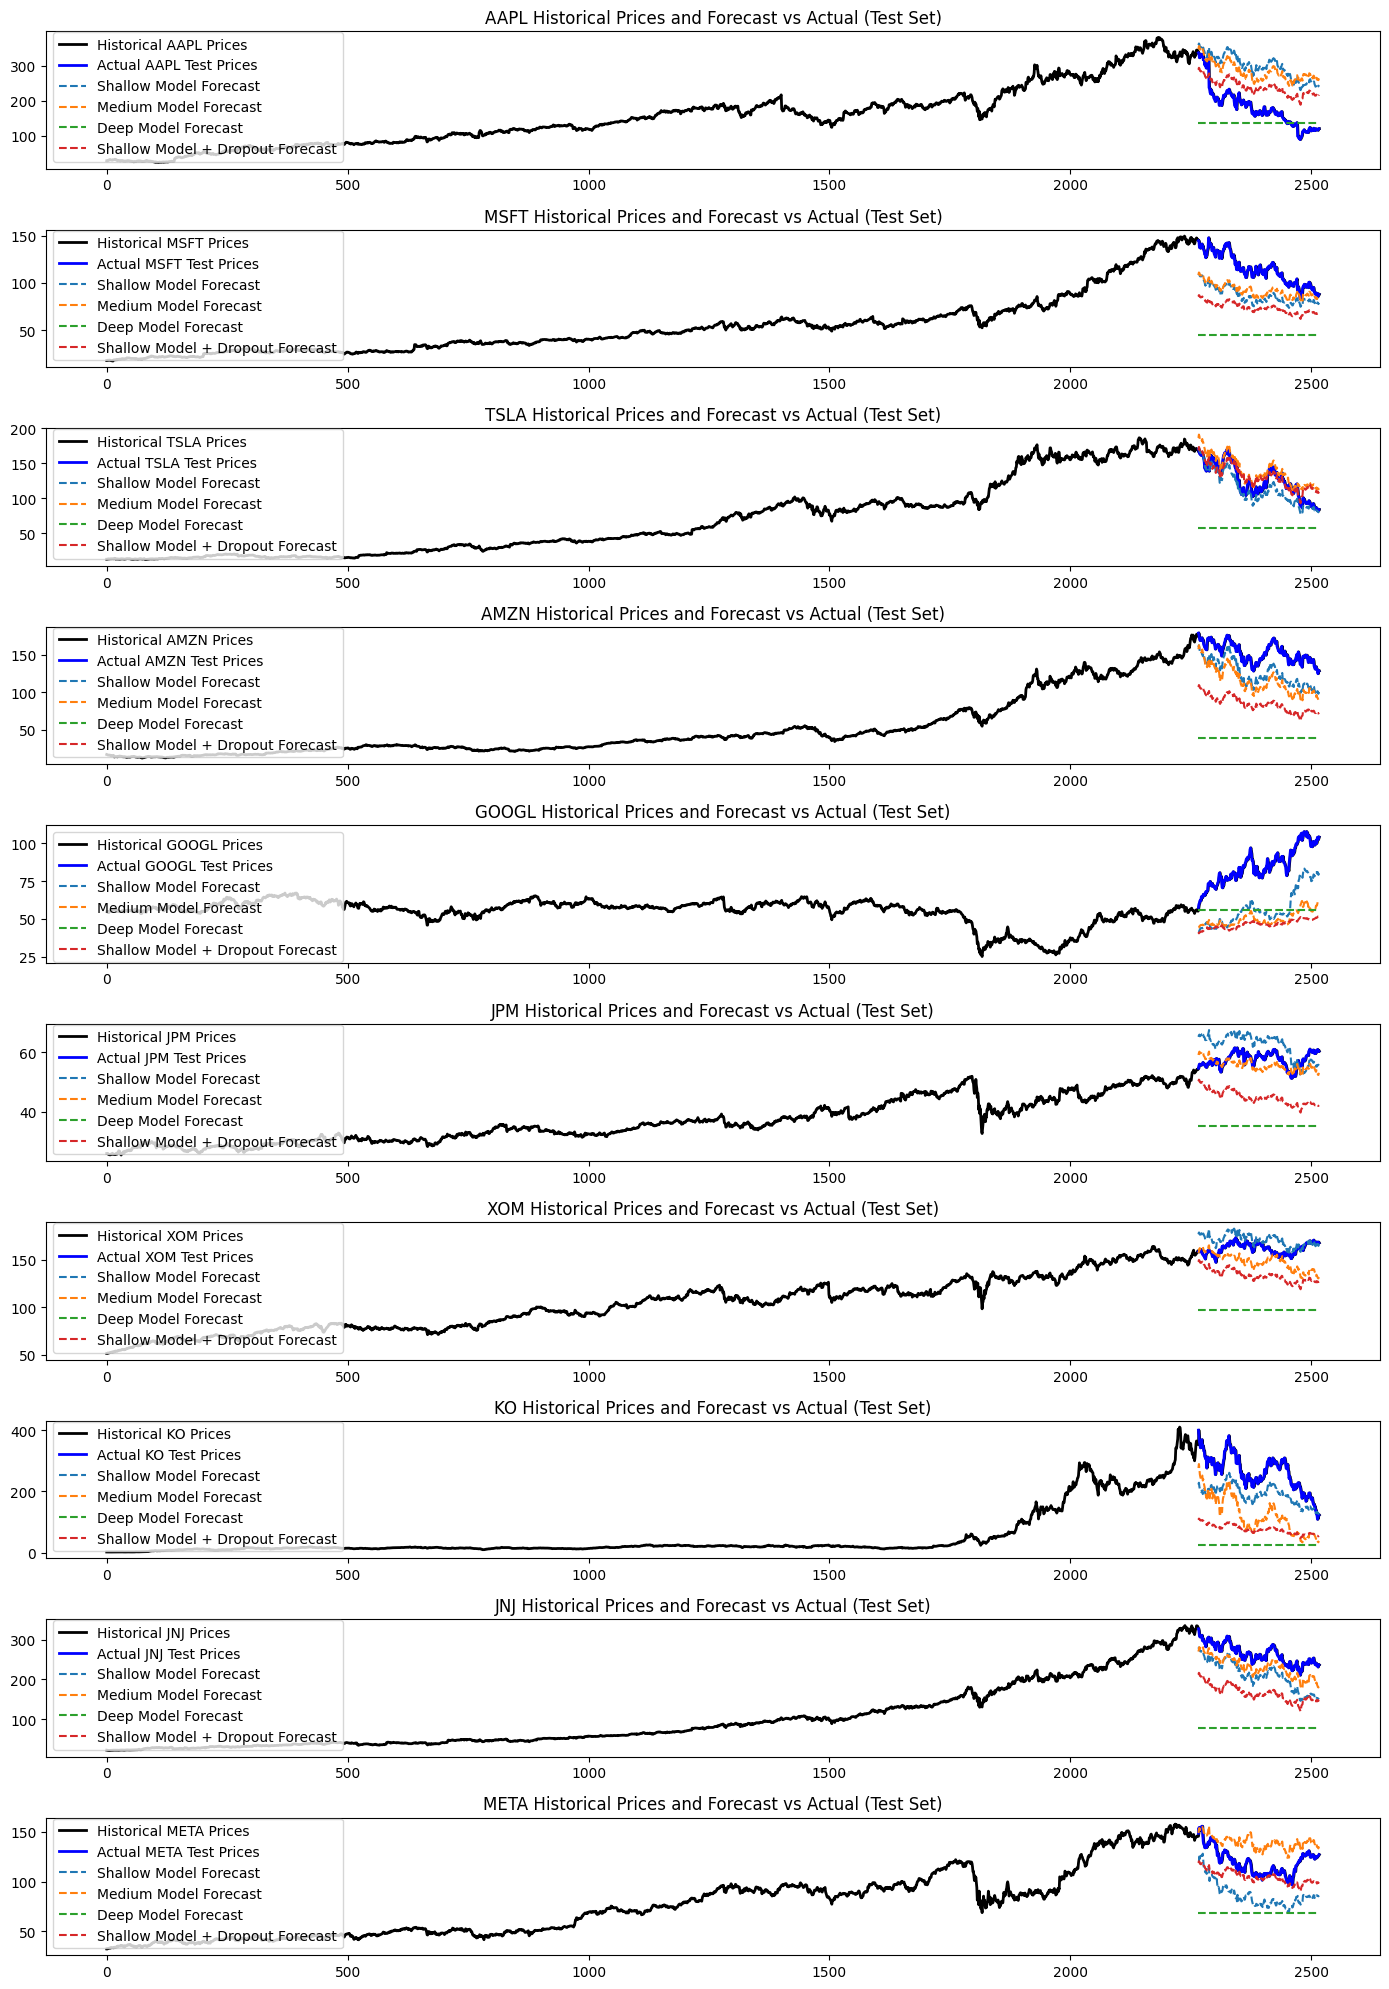

In [ ]:
# Adjusted plot to ensure matching dimensions between x and y
fig, axes = plt.subplots(len(tickers), 1, figsize=(14, 20))

for i, ticker in enumerate(tickers):
    # Plot historical prices (train + validation + test combined)
    axes[i].plot(full_actual_prices[:, i], label=f'Historical {ticker} Prices', color='black', linewidth=2)

    # Fix x-axis length to match y_test_rescaled
    x_test_range = np.arange(len(train_val_data), len(train_val_data) + len(y_test_rescaled))

    # Plot actual test values on the test portion
    axes[i].plot(x_test_range, y_test_rescaled[:, i], label=f'Actual {ticker} Test Prices', color='blue', linewidth=2)

    # Plot predictions from each model on the test portion
    axes[i].plot(x_test_range, pred_shallow_rescaled[:, i], label='Shallow Model Forecast', linestyle='--')
    axes[i].plot(x_test_range, pred_medium_rescaled[:, i], label='Medium Model Forecast', linestyle='--')
    axes[i].plot(x_test_range, pred_deep_rescaled[:, i], label='Deep Model Forecast', linestyle='--')
    axes[i].plot(x_test_range, pred_shallow_dropout_rescaled[:, i], label='Shallow Model + Dropout Forecast', linestyle='--')

    axes[i].set_title(f'{ticker} Historical Prices and Forecast vs Actual (Test Set)')
    axes[i].legend()

plt.tight_layout()
plt.show()
